# Lecture 6: Neural Network

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mrwenjie/wenjieinde577Project/blob/main/Supervised%20Learning/Lecture%206/Copy_of_Neuro_Network.ipynb)



### Pima Indians Diabetes Dataset Analysis

In this analysis, we are once again utilizing the Pima Indians Diabetes Dataset. The dataset has been used in numerous settings previously, making it a familiar resource for diabetes-related research.

#### Data Loading and Preprocessing

The Python libraries `pandas`, `sklearn`, and `matplotlib`, along with `tensorflow`, are imported to facilitate data handling, preprocessing, and visualization:

- **Pandas** is used for data manipulation and analysis.
- **Scikit-learn** provides tools for data splitting and scaling.
- **TensorFlow** is employed for constructing and training neural network models.
- **NumPy** supports numerical operations.
- **Matplotlib** is used for plotting graphs.

The dataset is loaded from a publicly accessible URL using `pandas.read_csv`. After loading, initial data cleaning is performed. Specifically, rows where the `Glucose` or `BloodPressure` values are zero (which likely represent missing data) are removed. This step is crucial for maintaining the integrity of the model, as such anomalous values can skew results.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv'
data = pd.read_csv(file_path)

# Remove rows where 'Glucose' or 'BloodPressure' are zero
data = data[(data['Glucose'] != 0) & (data['BloodPressure'] != 0)]

#### Data Inspection and Preparation

After cleaning the dataset, the next step involves inspecting the first few rows to ensure it has loaded correctly. This check helps verify that the data appears as expected:

In [6]:

# Display the first few rows of the dataset to verify it's loaded correctly
print(data.head())

# Split dataset into input (X) and output (y) variables
X = data.iloc[:, :-1].values  # Assuming the last column is the target variable
y = data.iloc[:, -1].values

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check shapes of the datasets
print("Training set shape:", train_X.shape, train_y.shape)
print("Testing set shape:", test_X.shape, test_y.shape)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Training set shape: (582, 8) (582,)
Testing set shape: (146, 8) (146,)


### Neural Network Model Construction and Training

#### Model Definition

For the analysis of the Pima Indians Diabetes Dataset, we utilize a neural network model constructed using TensorFlow's Keras API. The model architecture is defined as follows:

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Recall

# Define the model
model = Sequential([
    Dense(12, input_dim=8, activation='relu'),  # 8 features in the input layer
    Dense(8, activation='relu'),
    Dropout(0.1),  # Dropout layer added here with a dropout rate of 20%
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

- ***Input Layer***: The first layer is a dense layer with 12 nodes and uses the ReLU activation function. It expects 8 input features, corresponding to the 8 columns of the dataset.
- ***Hidden Layers***:: Two subsequent dense layers each have 8 nodes with ReLU activation functions to introduce non-linearity to the model, allowing it to learn more complex patterns.
- ***Dropout Layer***:: A dropout layer with a rate of 10% is included to prevent overfitting by randomly setting the outgoing edges of hidden units to 0 at each update during training.
- ***Output Layer***:: The final layer is a dense layer with a single node using a sigmoid activation function, suitable for binary classification, providing the output as a probability.

---
#### Dropout Layer: Preventing Overfitting Through Random Inactivation

One innovative feature of the neural network model is the inclusion of a dropout layer with a dropout rate of 10%. The concept of dropout is both practical and inspired by an observation from Geoffrey Hinton, a pioneer in the field of neural networks.

**Inspiration from Everyday Processes:**
The idea behind dropout was influenced by Hinton's observation of a policy in certain banks where employees, particularly tellers, were periodically rotated between branches. This policy was implemented to prevent any potential collusion between employees and customers, which could lead to fraud or other security issues. Hinton analogized this approach to neural network training, where too much familiarity (in the form of co-adaptation of neurons) could lead to overfitting.

**Implementation in Neural Networks:**
In the context of neural networks, dropout randomly deactivates a subset of neurons during each training iteration. This prevents neurons from co-adapting too much. Just as rotating bank tellers reduces the risk of collusion by disrupting potential overly familiar interactions, dropout disrupts the training process to ensure that no single neuron becomes overly reliant on the outputs of others. This helps the model achieve better generalization and reduces the likelihood of overfitting to the training data.

**Technical Benefits:**
- **Reduces Overfitting**: By temporarily removing different subsets of neurons, dropout forces the network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.
- **Improves Generalization**: Networks trained with dropout generalize better to unseen data. This is analogous to having a more versatile team of employees who can work more effectively in different environments because they are less likely to rely on fixed patterns or interactions.

---

**Model Compilation**

The model is compiled with the following settings:

In [8]:
# Compile the model to include recall
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Recall()])

- ***Loss Function***: binary_crossentropy is used as the loss function, which is appropriate for binary classification problems.
- ***Optimizer***: The adam optimizer is employed for efficient stochastic optimization.
- ***Metrics***: Both accuracy and Recall are included as metrics to monitor during training. Recall is particularly important in medical diagnostics where missing a positive case (false negative) can have severe consequences.


**Model Training**
The model is trained using the following parameters:

In [9]:
# Train the model
history = model.fit(train_X, train_y, epochs=100, batch_size=10, validation_split=0.2)


Epoch 1/100
47/47 [==============================] - 2s 9ms/step - loss: 0.6328 - accuracy: 0.6839 - recall: 0.1950 - val_loss: 0.6140 - val_accuracy: 0.6752 - val_recall: 0.0500
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 0.5756 - accuracy: 0.6731 - recall: 0.0566 - val_loss: 0.5804 - val_accuracy: 0.6667 - val_recall: 0.0250
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 0.5390 - accuracy: 0.6860 - recall: 0.0943 - val_loss: 0.5678 - val_accuracy: 0.6923 - val_recall: 0.1000
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.6989 - recall: 0.1950 - val_loss: 0.5601 - val_accuracy: 0.7265 - val_recall: 0.2250
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 0.5115 - accuracy: 0.7419 - recall: 0.4088 - val_loss: 0.5496 - val_accuracy: 0.7521 - val_recall: 0.3500
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4870 - accuracy: 0.7591 - reca

- ***Epochs***: The model will train for 100 epochs, which determines how many times the learning algorithm will work through the entire training dataset.
- ***Batch Size***:: A batch size of 10 is used, which specifies the number of training examples utilized in one iteration.
- ***Validation Split***:: 20% of the training data is set aside as a validation dataset. This data is not used to train the model, but to evaluate its performance after each epoch, helping in tuning the model's hyperparameters while avoiding overfitting.

### Model Evaluation and Visualization

#### Model Evaluation

After training the neural network, it is crucial to evaluate its performance using the testing set. This assessment provides insights into how well the model generalizes to new, unseen data. The evaluation results include loss, accuracy, and recall:

- **Loss**: Indicates the model's performance in terms of how well it predicted the test data. A lower loss suggests better predictions.
- **Accuracy**: Measures the proportion of correct predictions over the total number of cases evaluated. It helps gauge the overall effectiveness of the model in classifying the data correctly.
- **Recall**: Especially critical in medical applications, recall assesses the model's ability to identify all relevant instances (e.g., all patients with diabetes). A high recall rate is crucial for ensuring that the model minimizes false negatives, which are potentially more dangerous than false positives in many medical scenarios.


In [10]:
# Evaluate the model and unpack all results
loss, accuracy, recall = model.evaluate(test_X, test_y)
print(f"Model loss: {loss:.2f}")
print(f"Model accuracy: {accuracy:.2f}")
print(f"Model recall: {recall:.2f}")


5/5 [==============================] - 0s 5ms/step - loss: 0.4828 - accuracy: 0.7466 - recall: 0.6078
Model loss: 0.48
Model accuracy: 0.75
Model recall: 0.61



#### Visualization of Training History

Visualizing the training history is an essential step for understanding the learning dynamics of the model. It involves plotting the accuracy over each epoch for both the training and validation datasets. This visualization helps identify trends such as overfitting or underfitting:

- **Training Accuracy**: Shows how accurately the model predicts the training data throughout the learning process. It should ideally increase over time.
- **Validation Accuracy**: Reflects how well the model performs on a separate part of the data that it has not been trained on. This is a good indicator of the model's ability to generalize. If the validation accuracy is much lower than the training accuracy, it might suggest that the model is overfitting.

This plot is crucial for diagnosing the learning behavior of the model, facilitating decisions about whether the training process needs adjustment, such as changing the model's architecture or training parameters.

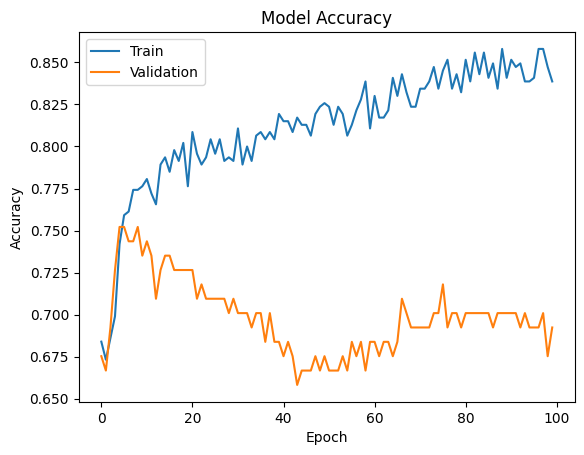

In [11]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


It's not quite easy to tell exatcly which epoch have the maximum accurarcy. So let the code tell us.

In [15]:
max_accuracy_epoch = np.argmax(history.history['val_accuracy']) + 1  # Adding 1 because indexing starts at 0

print("Epoch with maximum evaluation accuracy:", max_accuracy_epoch)


Epoch with maximum evaluation accuracy: 5


Now we know it's 5. But actually we have other methods to evaluate the model.

## Model Evaluation Metrics

### Accuracy
Accuracy is one of the most common evaluation metrics used in machine learning. It represents the ratio of the number of correct predictions to the total number of input samples. It is particularly useful when the classes in the dataset are nearly balanced. Accuracy is calculated as:
\[ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions Made}} \]

### Recall
Recall, also known as sensitivity or true positive rate, measures the proportion of actual positives that are correctly identified by the model. It is especially important when the cost of false negatives is high. For example, in medical screening tests, failing to detect a disease could have severe consequences. Recall is defined as:
\[ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of True Positives} + \text{Number of False Negatives}} \]

Recall is crucial in situations where missing a positive instance is significantly worse than falsely identifying a negative instance as positive.

Both accuracy and recall provide valuable insights into the effectiveness of a model, helping to identify strengths and weaknesses in its predictive capabilities.

Here we plot the training accuracy and recall.

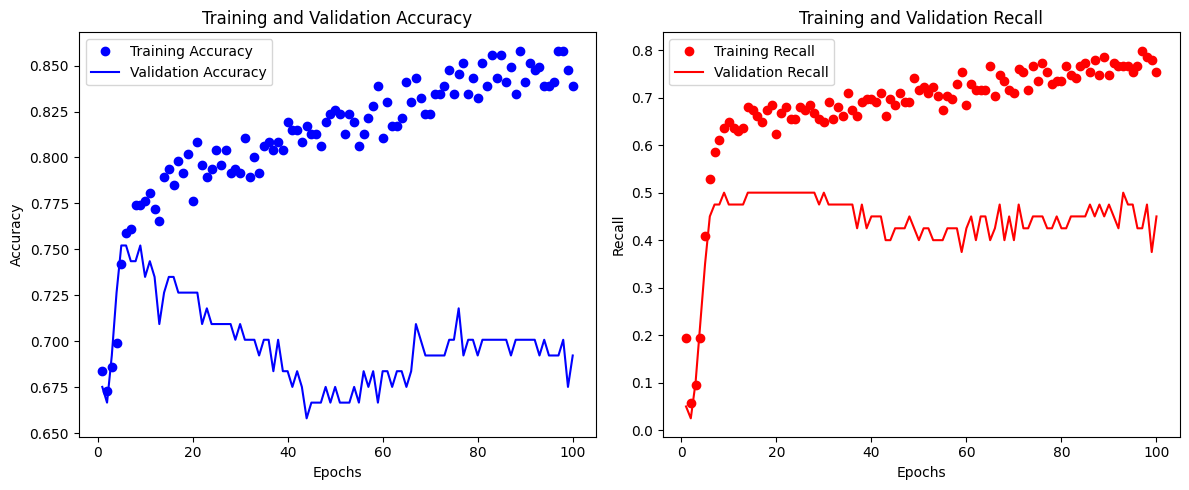

In [17]:
import matplotlib.pyplot as plt

# First, verify and correct these keys according to your print statement's output
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
recall = history.history['recall']  # Adjusted key name for recall
val_recall = history.history['val_recall']  # Adjusted key name for validation recall
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot recall
plt.subplot(1, 2, 2)
plt.plot(epochs, recall, 'ro', label='Training Recall')
plt.plot(epochs, val_recall, 'r', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
max_accuracy_epoch = np.argmax(history.history['val_recall']) + 1  # Adding 1 because indexing starts at 0

print("Epoch with maximum evaluation recall:", max_accuracy_epoch)


Epoch with maximum evaluation recall: 9


It seems like the model become worse after 9 epochs when use recall as the evaluation method. In this case, I would use 5 epoch in my final model.

In [18]:
# Define the model
model = Sequential([
    Dense(12, input_dim=8, activation='relu'),  # 8 features in the input layer
    Dense(8, activation='relu'),
    Dropout(0.1),  # Dropout layer added here with a dropout rate of 20%
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])



# Compile the model to include recall
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Recall()])


history = model.fit(train_X, train_y, epochs=5, batch_size=10, validation_split=0.2)


Epoch 1/5
47/47 [==============================] - 1s 8ms/step - loss: 0.6756 - accuracy: 0.6538 - recall_1: 0.5409 - val_loss: 0.6596 - val_accuracy: 0.7094 - val_recall_1: 0.5750
Epoch 2/5
47/47 [==============================] - 0s 5ms/step - loss: 0.6451 - accuracy: 0.6839 - recall_1: 0.4151 - val_loss: 0.6227 - val_accuracy: 0.7692 - val_recall_1: 0.4750
Epoch 3/5
47/47 [==============================] - 0s 6ms/step - loss: 0.5992 - accuracy: 0.7312 - recall_1: 0.4277 - val_loss: 0.5831 - val_accuracy: 0.7692 - val_recall_1: 0.4750
Epoch 4/5
47/47 [==============================] - 0s 6ms/step - loss: 0.5582 - accuracy: 0.7505 - recall_1: 0.4969 - val_loss: 0.5510 - val_accuracy: 0.7350 - val_recall_1: 0.4750
Epoch 5/5
47/47 [==============================] - 0s 5ms/step - loss: 0.5271 - accuracy: 0.7419 - recall_1: 0.5283 - val_loss: 0.5326 - val_accuracy: 0.7692 - val_recall_1: 0.5750


Again evaluate our model

5/5 [==============================] - 0s 3ms/step - loss: 0.4908 - accuracy: 0.7534 - recall_1: 0.5686
Model loss: 0.49
Model accuracy: 0.75
Model recall: 0.57


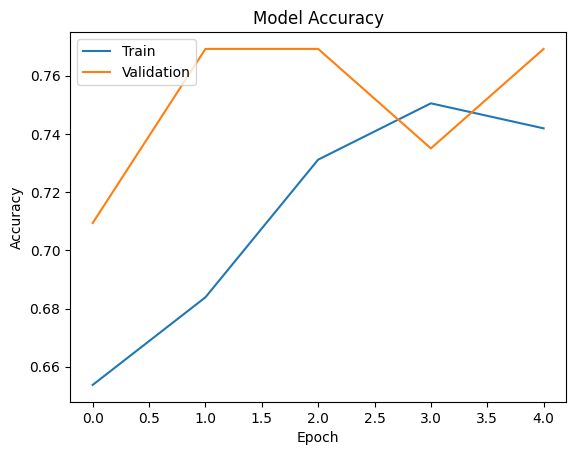

In [19]:
# Evaluate the model and unpack all results
loss, accuracy, recall = model.evaluate(test_X, test_y)
print(f"Model loss: {loss:.2f}")
print(f"Model accuracy: {accuracy:.2f}")
print(f"Model recall: {recall:.2f}")


# Plot training history
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


So that's all of it. You can play with the model by adding more layers or changing number of nodes in each layer to see different results!